# Importation

In [1218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error



#Régression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_rand_score
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import omni_normtest
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

# Pca, cluster
from sklearn.decomposition import PCA
from sklearn import cluster, metrics
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Importer la fonction nécessaire
from statsmodels.stats.diagnostic import het_white


pd.options.mode.chained_assignment = None  # default='warn'

In [1219]:
billets=pd.read_csv("billets.csv", sep = ';')

# Cleaning des données

In [1220]:
billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [1221]:
print(billets.shape)

(1500, 7)


In [1222]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [1223]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [1224]:
#Valeurs manquantes
print(billets.isnull().sum(axis = 0))

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [1225]:
#Il y à 37 valeurs manquantes sur la variable margin_low 
# Récupération des billets avec les données completes
billets_full = billets.dropna() 
# Récupération des billets avec les données manquantes.
billets_nan = billets[billets.isnull().any(axis=1)] 

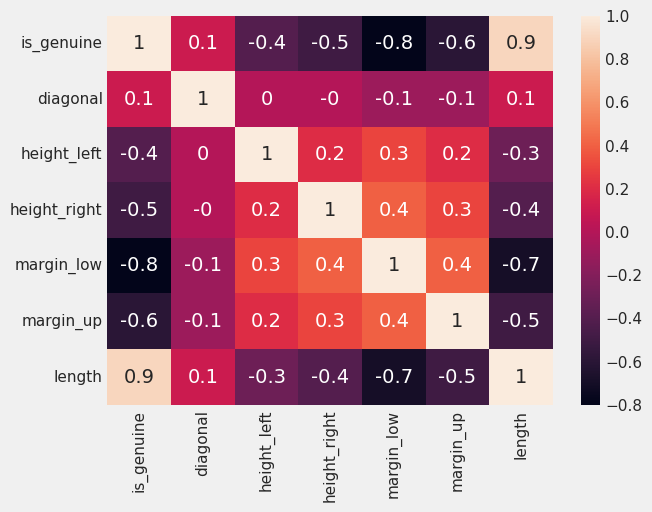

In [1226]:
#Matrice de corrélation
matrice_corr = billets_full.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)
plt.savefig('matrice_corr.png')

In [1227]:
#Nous allons utiliser une regression linéaire pour combler les informations manquantes de margin_low qui est très 
#corrélé à is_geiune et à lenght.

# Régréssion linéaire

In [1228]:
#On met les données de lenght dans X et celles de margin_low dans Y
X = billets_full[ "length"]
Y = billets_full['margin_low']

In [1229]:
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [1230]:
# Fractionner la base de données en test et entrainement stra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=40)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1170, 1)
(293, 1)
(1170, 1)
(293, 1)


In [1231]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [1232]:
#Prédiction test
Y_test_predict = lr.predict(X_test)
R2 = r2_score(Y_test, Y_test_predict).round(2)
coef = (lr.coef_).round(2)

# Affichage des valeurs de l'évaluation
print("La performance du Modèle pour le set de Test")
print("------------------------------------------------")
print("le score R carré est {}".format(R2))
print("Le coéfficien de la pente {}".format(coef))
print("\n")

La performance du Modèle pour le set de Test
------------------------------------------------
le score R carré est 0.49
Le coéfficien de la pente [[-0.49]]




In [1233]:
#Le R²(Coéfficien de détermination) est de 0.49, la moitié de la variation observée peut être expliquée par les entrées du modèles.
#Le coéfficien de la pente nous indique que pour chaque mm en plus sur la longueur on ajoute -0.49 a la marge du bas. Plus le billets et long plus la marge bas est reduite

In [1234]:
#Mesure d'erreur couramment utilisée pour évaluer la performance d'un modèle de régression il mesure la moyenne des
#carrés des différences entre les valeurs prédites par le modèle et les valeurs réelles de l'ensemble de données
rmse = np.sqrt(mean_squared_error(Y_test, Y_test_predict))
# Affichage des résultats
print("RMSE:", rmse)

RMSE: 0.48780231021720516


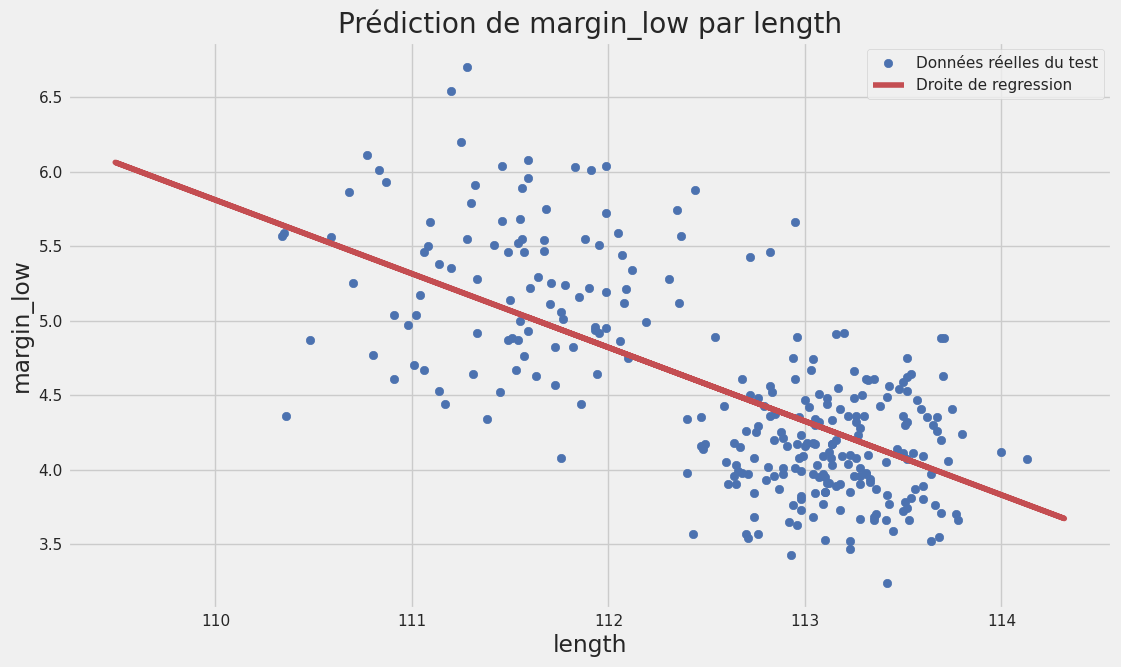

In [1235]:
fig = plt.figure(figsize=(12, 7))
plt.scatter(X_test, Y_test, color = "b", label = "Données réelles du test")
plt.plot(X_train, lr.predict(X_train), color = "r", label= "Droite de regression")
plt.title("Prédiction de margin_low par length")
plt.xlabel("length")
plt.ylabel("margin_low")
plt.legend()
plt.savefig('regression_droite.png')
plt.show();

La droite qui s'affiche est la première bissectrice. Si le modèle était parfait, les valeurs réelles et les valeurs ajustées seraient égales, donc sur un tel graphique, les points seraient alignés sur la droite d'équation  𝑦=𝑥
 , soit la première bissectrice.

# Représentez les résidus du modèle

In [1236]:
#On peut obtenir les résidus du modèle à l'aide de cette commande :
billets_full["prediction_margin_low"] = lr.predict(X)

In [1237]:
#Création d'une colonné résidus (différence entre valeur reel et prédict)
billets_full["residus"] = billets_full["margin_low"] - billets_full["prediction_margin_low"]
billets_full

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  prediction_margin_low   residus  
0     112.83               4.409079  0.110921  
1     113.09               4.280389 -0.510389  
2     113.16               4.245741  0.154259  
3     113.51               4.072504 -0.452504  
4     112.54               4.552618 -0.512618  
...      ...                    ...       ...  
1495  111.28               5.176271 -0.756271  
1496  110.97               5.329710 -0.059710  
1497  111.95               4.844646  0.665354  
1498  112.25               4.696157  0.473843  
1499  112.07               4.785251 -0.155251  

[1463 rows x 9 columns]

# Homoscédasticité

{'Test Statistic': 109.86015196863785, 'p-value': 2.0828244990004768e-14, 'F-Statistic': 5.853731207799894, 'F-Test p-value': 4.974865092757492e-15}


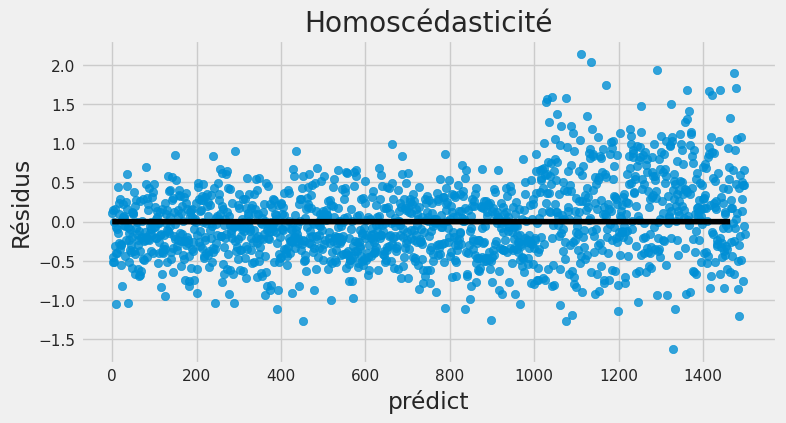

In [1238]:
#Désigne la propriété de certains modèles de régression linéaire dans lesquels les erreurs d'estimation sont constantes tout au long des observations.
from statsmodels.stats.diagnostic import het_white , normal_ad
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
# Instanciation:
fit = smf.ols("margin_low ~ height_right + height_left + margin_up + length + diagonal", data =billets_full).fit()

# Homoscedasticite:
white_test = het_white(fit.resid, fit.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

# Graphique:
plt.subplots(figsize=(8, 4))
plt.scatter(x=billets_full.index, y=billets_full["residus"], alpha=0.8)
plt.plot(np.repeat(0, len(billets_full.index)+2), color="black", linestyle='-')
plt.xlabel("prédict")
plt.ylabel("Résidus")
plt.title("Homoscédasticité")
plt.savefig('Homoscédasticité.png')

Absence d'homoscédasticité

# Normalité des résidus

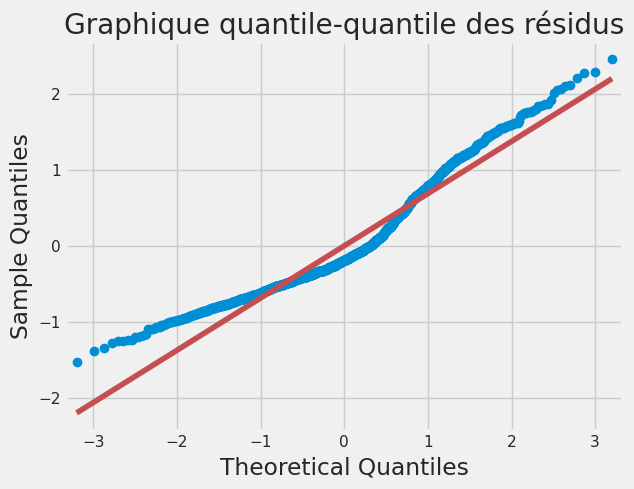

Test de Shapiro-Wilk - Statistique : 139.9905744122641
Test de Shapiro-Wilk - P-value : 3.9942294286981385e-31


In [1239]:
# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(Y, X)
results = model.fit()

# Obtenir les résidus du modèle
residues = results.resid

# Vérifier la normalité des résidus en affichant un histogramme
plt.hist(residues, bins='auto')
plt.title('Histogramme des résidus')
plt.show()

# Vérifier la normalité des résidus en affichant un graphique quantile-quantile (QQ plot)
sm.qqplot(residues, line='s')
plt.title('Graphique quantile-quantile des résidus')
plt.show()

# Effectuer le test de Shapiro-Wilk pour vérifier la normalité des résidus
shapiro_test_statistic, shapiro_p_value = omni_normtest(residues)
print("Test de Shapiro-Wilk - Statistique :", shapiro_test_statistic)
print("Test de Shapiro-Wilk - P-value :", shapiro_p_value)

In [1240]:
#Hypothèse nulle (H0) p>0,05 : Les données suivent une distribution normale (les résidus suivent une distribution normale).
#Hypothèse alternative (H1) p<0,05 : Les données ne suivent pas une distribution normale (les résidus ne suivent pas une distribution normale).

In [1241]:
#Les données ne suivent pas une loi normale

Les performances du modèle de regression linéaire simple basé sur une seule variable prédictive n'étant pas optimales, nous testerons la version basée sur plusieurs variables.

# Régréssion linéaire multiple

In [1242]:
# Supposons que 'billets' est le DataFrame contenant vos données avec les valeurs manquantes dans 'margin_low'
# Séparer le DataFrame en deux ensembles : données complètes et données manquantes de 'margin_low'
billets_full = billets.dropna(subset=['margin_low'])
billets_nan = billets[billets['margin_low'].isnull()]
# Définir les variables indépendantes (prédicteurs) et la variable dépendante (à prédire)
X_train = billets_full[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = billets_full['margin_low']
# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(y_train, sm.add_constant(X_train))  # On ajoute une colonne de 1 pour la constante
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 31 Aug 2023   Prob (F-statistic):          2.60e-202
Time:                        19:08:06   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382      0.017       4.055      41.935
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1243]:
#On constate ici que tout les paramètres sont significativement différents de 0, car leur p-valeur est inférieure à 5 %, le niveau de test que nous souhaitons.
#Toutes les variables sont donc significatives

In [1244]:
# Prédire les valeurs manquantes de 'margin_low' à l'aide du modèle ajusté
X_test = billets_nan[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
X_test.head()

diagonal  height_left  height_right  margin_up  length
72     171.94       103.89        103.45       3.25  112.79
99     171.93       104.07        104.18       3.14  113.08
151    172.07       103.80        104.38       3.02  112.93
197    171.45       103.66        103.80       3.62  113.27
241    171.83       104.14        104.06       3.02  112.36

In [1245]:
predicted_margin_low = results.predict(sm.add_constant(X_test))
predicted_margin_low.head()

72     4.318525
99     4.393668
151    4.410457
197    4.319014
241    4.650617
dtype: float64

In [1246]:
billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

# Normalité des résidus

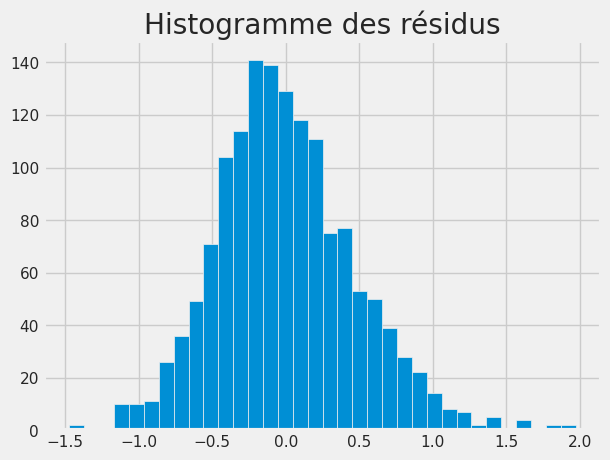

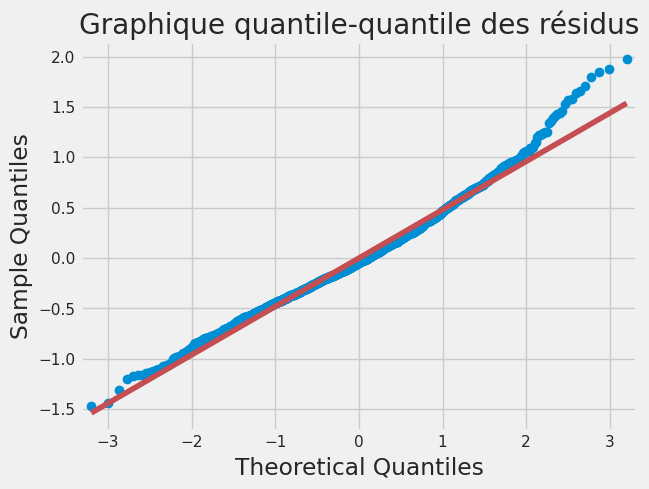

Statistique de test de Shapiro-Wilk : 0.9857882857322693
P-valeur : 8.540482210328548e-11


In [1247]:
import scipy.stats as stats
residues = results.resid
# Vérifier la normalité des résidus en affichant un histogramme
plt.hist(residues, bins='auto')
plt.title('Histogramme des résidus')
plt.show()
# Vérifier la normalité des résidus en affichant un graphique quantile-quantile (QQ plot)
sm.qqplot(residues, line='s')
plt.title('Graphique quantile-quantile des résidus')
plt.show()
# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residues)
print("Statistique de test de Shapiro-Wilk :", shapiro_test_statistic)
print("P-valeur :", shapiro_p_value)
# Interprétation du test de Shapiro-Wilk :
# Si la p-valeur est supérieure au seuil de signification (par exemple 0.05),
# cela indique que les résidus suivent une distribution normale.
# Sinon, on rejette l'hypothèse nulle de normalité (les résidus ne suivent pas une distribution normale).

In [1248]:
#p value<0,5 on rejette donc l'hypothèse H0 e notre modèle ne suite pas une loie normale

# Multi colinéaritée


Pour détecter la multicollinéarité dans un modèle de régression multiple, l'une des méthodes courantes est d'examiner les valeurs des facteurs d'inflation de la variance (VIF) pour chaque variable indépendante. Un VIF élevé indique une forte corrélation entre une variable indépendante et les autres, ce qui peut entraîner des problèmes d'interprétation des coefficients et de stabilité du modèle.



In [1249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculer les VIF pour chaque variable indépendante
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)


       Variable            VIF
0      diagonal  170566.670778
1   height_left  111895.309916
2  height_right  100858.864433
3     margin_up     261.969190
4        length   22708.222743


Generalement, un VIF au dessus de 5 indique une forte multicolinnéarité

# Homoscédasticité des résidus

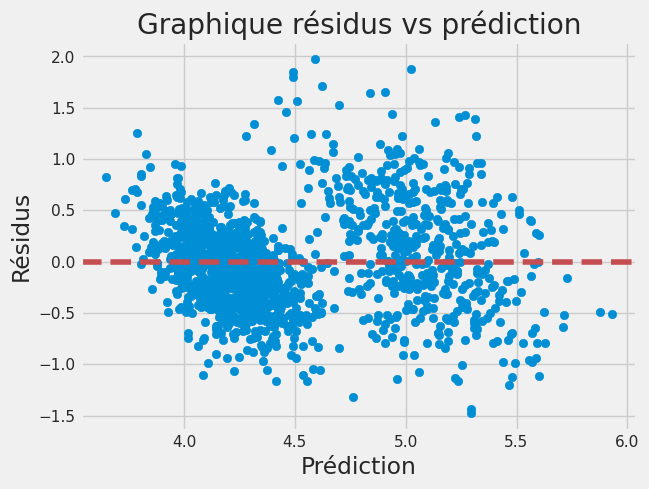

Statistique de test de White : 109.86015196914511
P-valeur : 2.082824498556954e-14


In [1250]:
# Vérifier l'homoscédasticité des résidus en affichant un graphique résidus vs prédiction
plt.scatter(results.fittedvalues, residues)
plt.xlabel('Prédiction')
plt.ylabel('Résidus')
plt.title('Graphique résidus vs prédiction')
plt.axhline(y=0, color='r', linestyle='dashed')  # Ajouter une ligne horizontale à y=0 pour la référence
plt.show()

# Calculer le test de White pour tester l'homoscédasticité des résidus
white_test_statistic, white_test_p_value, _, _ = het_white(residues, results.model.exog)
print("Statistique de test de White :", white_test_statistic)
print("P-valeur :", white_test_p_value)
#p-value<0,5 on rejette alors l'hypothèse H0 et on conclut qu'il n'y a pas d'homoscédasticité présente dans ce modèle

Nous utiliserons un autre modèle pour prédire les valeurs manquantes pour 'margin_low' car aucun des deux modèles de regression linéaire ne satisfait les critères

# KNN

In [1251]:
# Séparation X (features) et y (is_genuine)
X = billets_full[['length', 'margin_low','margin_up','height_right']].copy()
y = billets_full.is_genuine

# Séparation train data et test data avec la méthod sklearn : train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=5)

print("Nous avons X_train de forme", X_train.shape,"et y_train de forme",y_train.shape)
print("Nous avons X_test de forme", X_test.shape,"et y_test de forme",y_test.shape)

Nous avons X_train de forme (1024, 4) et y_train de forme (1024,)
Nous avons X_test de forme (439, 4) et y_test de forme (439,)


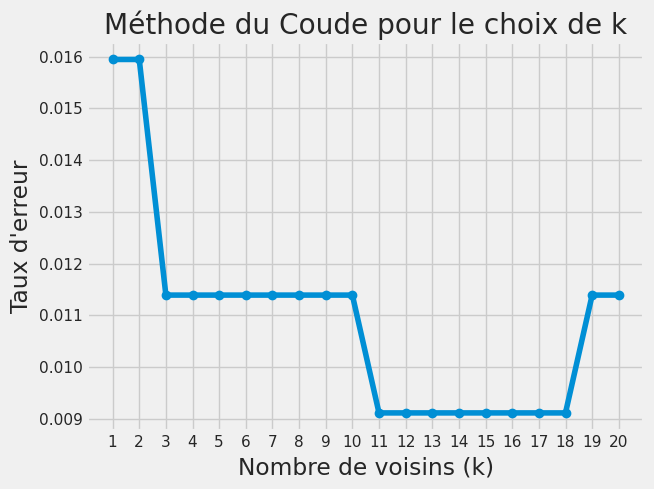

In [1252]:
# Calculer les erreurs pour différentes valeurs de k
error_rates = []
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

# Tracer le graphique des erreurs en fonction de k
plt.plot(range(1, 21), error_rates, marker='o')
plt.title("Méthode du Coude pour le choix de k")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Taux d'erreur")
plt.xticks(range(1, 21))
plt.show()


In [1253]:
# Séparer le DataFrame en deux ensembles : données complètes et données manquantes de 'margin_low'
billets_full = billets.dropna(subset=['margin_low'])
billets_nan = billets[billets['margin_low'].isnull()]

# Diviser les données complètes en ensembles d'entraînement et de test
X_train_full = billets_full[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train_full = billets_full['margin_low']
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Créer et ajuster le modèle k-NN
k = 10 # Le nombre de voisins à considérer
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Prédire les valeurs manquantes
predicted_values = knn_model.predict(billets_nan[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']])
billets_nan['margin_low'] = predicted_values

In [1254]:
# Combiner les données complètes et les données avec les prédictions
billets_filled = pd.concat([billets_full, billets_nan])
billets_filled

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95       4.520       2.89   
1           True    171.46       103.36        103.66       3.770       2.99   
2           True    172.69       104.48        103.50       4.400       2.94   
3           True    171.36       103.91        103.94       3.620       3.01   
4           True    171.73       104.28        103.46       4.040       3.48   
...          ...       ...          ...           ...         ...        ...   
1303       False    172.17       104.49        103.76       5.239       2.93   
1315       False    172.08       104.15        104.17       4.893       3.40   
1347       False    171.72       104.46        104.12       5.019       3.61   
1435       False    172.66       104.33        104.41       4.964       3.56   
1438       False    171.90       104.28        104.29       5.171       3.24   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49  

[1500 rows x 7 columns]

In [1255]:
# Maintenant, billets_filled contient les valeurs manquantes de 'margin_low' remplies par le modèle k-NN
#Valeurs manquantes
billets=billets_filled
print(billets.isnull().sum(axis = 0))

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [1256]:
error = 1 - knn_model.score(X_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.389834


# Analyse des outliers

In [1257]:
billets_n= billets

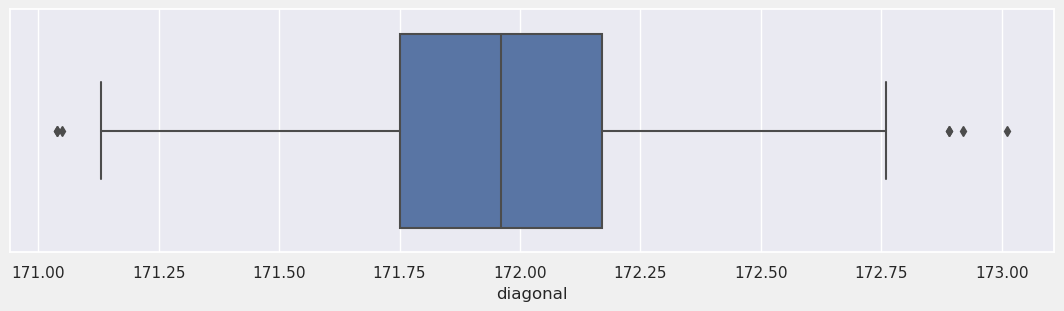

Premier quartile: 171.75
Troisième qurtile: 172.17
Ecart interquartile: 0.4199999999999875
Min: 171.12
Max: 172.79999999999995


In [1258]:
#Représentation la variable Diagonal sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=billets_n["diagonal"], color="b")
plt.show()
diagonal= billets_n["diagonal"]
diagonal = sorted(diagonal)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(diagonal,[25,75])
print("Premier quartile:",q1)
print("Troisième qurtile:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("Ecart interquartile:",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("Min:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("Max:",trait_superieur)

In [1259]:
#Recherche des outliers 
billets_n.loc[billets_n["diagonal"]>172.79999999999995]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
828         True    172.92       103.55        103.94        4.78       3.27   
842         True    172.89       103.77        104.24        4.12       3.01   
1022       False    172.89       104.03        104.03        6.03       3.00   
1277       False    173.01       104.59        104.31        5.04       3.05   

      length  
828   113.55  
842   113.72  
1022  110.95  
1277  110.91

In [1260]:
#Recherche des outliers inferieurs
billets_n.loc[billets_n["diagonal"]<171.12]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
729         True    171.04       103.84        103.64        4.22       3.36   
1142       False    171.04       104.23        104.22        4.87       3.56   
1388       False    171.05       104.09        104.50        4.72       3.10   

      length  
729   112.70  
1142  111.54  
1388  112.44

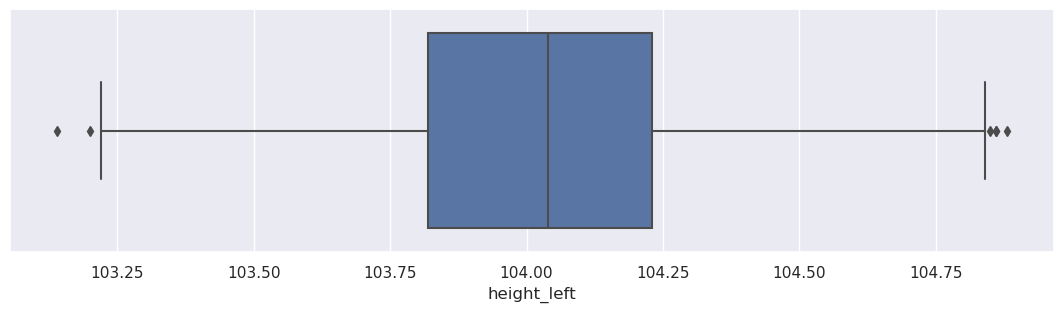

Premier quartile: 103.82
Troisième qurtile: 104.23
Ecart interquartile: 0.4100000000000108
Min: 103.20499999999998
Max: 104.84500000000003


In [1261]:
#Représentation la variable height_left sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=billets_n["height_left"], color="b")
plt.show()
height_left= billets_n["height_left"]
height_left= sorted(height_left)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(height_left,[25,75])
print("Premier quartile:",q1)
print("Troisième qurtile:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("Ecart interquartile:",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("Min:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("Max:",trait_superieur)

In [1262]:
#Recherche des outliers 
billets_n.loc[billets_n["height_left"]>104.84500000000003]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1090       False    172.11       104.88        104.10        4.80       3.73   
1150       False    171.79       104.86        104.34        5.39       3.14   
1382       False    171.97       104.85        104.52        5.87       3.56   

      length  
0     112.83  
1090  110.78  
1150  113.02  
1382  110.98

In [1263]:
#Recherche des outliers 
billets_n.loc[billets_n["height_left"]<103.20499999999998]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
224        True    172.12       103.20        103.92        4.46       3.26   
292        True    172.09       103.14        103.81        4.88       3.01   

     length  
224  113.44  
292  113.69

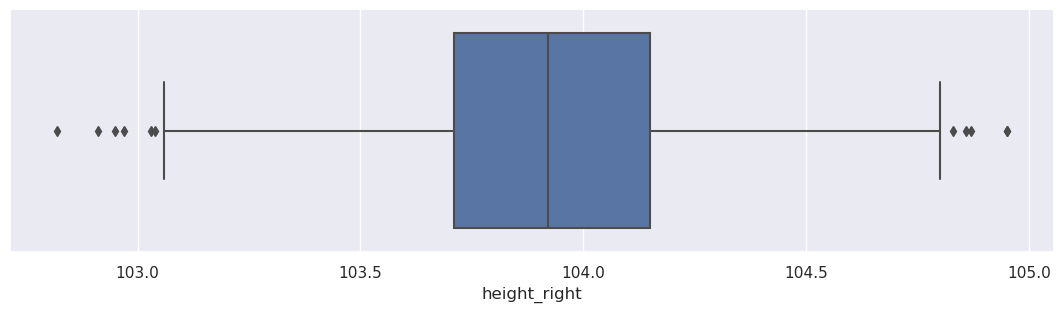

Premier quartile: 103.71
Troisième qurtile: 104.15
Ecart interquartile: 0.44000000000001194
Min: 103.04999999999998
Max: 104.81000000000003


In [1264]:
#Représentation la variable height_right sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=billets_n["height_right"], color="b")
plt.show()
height_right= billets_n["height_right"]
height_right= sorted(height_right)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(height_right,[25,75])
print("Premier quartile:",q1)
print("Troisième qurtile:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("Ecart interquartile:",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("Min:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("Max:",trait_superieur)

In [1265]:
#Recherche des outliers 
billets_n.loc[billets_n["height_right"]<103.04999999999998]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
77         True    171.84       104.09        103.03       4.110       2.77   
176        True    171.75       103.63        102.97       4.460       2.77   
193        True    172.35       103.73        102.95       4.490       3.37   
522        True    172.02       104.42        102.91       3.860       3.12   
761        True    172.16       103.93        103.04       4.140       2.99   
251        True    171.80       103.26        102.82       4.278       2.95   

     length  
77   113.18  
176  113.22  
193  112.49  
522  113.43  
761  113.26  
251  113.22

In [1266]:
#Recherche des outliers 
billets_n.loc[billets_n["height_right"]>104.81000000000003]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1199       False    172.03       104.32        104.87        4.49       3.77   
1321       False    172.29       104.72        104.86        5.71       3.16   
1331       False    172.32       104.60        104.83        4.84       3.51   
1484       False    172.08       103.96        104.95        5.22       3.45   

      length  
0     112.83  
1199  111.04  
1321  112.15  
1331  112.55  
1484  112.07

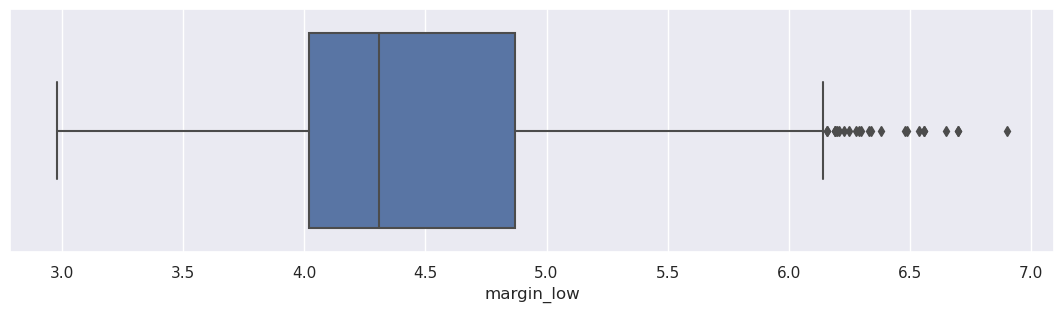

Premier quartile: 4.02
Troisième qurtile: 4.87
Ecart interquartile: 0.8500000000000005
Min: 2.7449999999999988
Max: 6.145000000000001


In [1267]:
#Représentation la variable margin_low sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=billets_n["margin_low"], color="b")
plt.show()
margin_low= billets_n["margin_low"]
margin_low= sorted(margin_low)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(margin_low,[25,75])
print("Premier quartile:",q1)
print("Troisième qurtile:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("Ecart interquartile:",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("Min:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("Max:",trait_superieur)

In [1268]:
#Recherche des outliers 
billets_n.loc[billets_n["margin_low"]>6.145000000000001]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1023       False    172.02       104.26        104.20        6.20       3.58   
1027       False    171.63       104.02        104.66        6.70       3.28   
1031       False    172.40       104.00        103.82        6.33       3.10   
1041       False    171.77       104.12        104.42        6.65       3.63   
1053       False    171.85       104.52        104.05        6.21       3.43   
1075       False    172.02       104.51        103.69        6.23       3.39   
1092       False    171.87       104.76        104.02        6.30       3.61   
1110       False    171.73       104.32        104.07        6.56       3.30   
1124       False    171.88       103.92        104.27        6.70       3.11   
1133       False    171.79       103.99        103.67        6.16       3.52   
1134       False    171.91       103.70        104.41        6.34       3.50   
1169       False    171.99       104.14        104.15        6.48       3.42   
1254       False    171.15       104.09        104.30        6.49       3.20   
1290       False    171.94       104.06        104.22        6.90       3.36   
1322       False    172.07       104.50        104.23        6.19       3.07   
1345       False    171.56       104.17        103.87        6.16       3.38   
1348       False    171.84       104.32        104.50        6.28       3.00   
1353       False    171.61       104.04        104.06        6.19       3.08   
1420       False    171.56       104.47        104.04        6.38       3.43   
1426       False    172.22       103.92        104.03        6.25       3.14   
1441       False    171.63       104.55        103.81        6.56       3.10   
1459       False    171.78       104.31        103.82        6.19       3.25   
1464       False    172.07       104.17        104.37        6.54       3.54   
1473       False    171.76       104.04        104.12        6.29       3.20   

      length  
1023  111.25  
1027  111.28  
1031  112.11  
1041  111.53  
1053  111.96  
1075  112.35  
1092  111.29  
1110  112.80  
1124  110.93  
1133  110.93  
1134  113.05  
1169  112.16  
1254  111.61  
1290  111.70  
1322  111.21  
1345  111.55  
1348  111.06  
1353  110.73  
1420  112.12  
1426  110.89  
1441  111.87  
1459  111.14  
1464  111.20  
1473  112.87

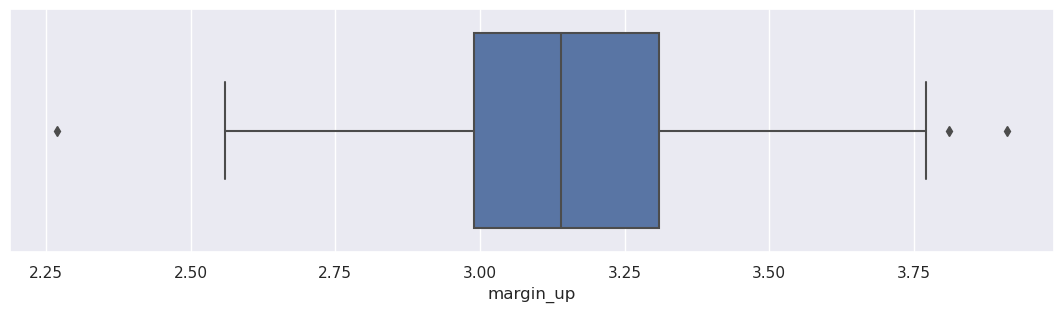

Premier quartile: 2.99
Troisième qurtile: 3.31
Ecart interquartile: 0.31999999999999984
Min: 2.5100000000000007
Max: 3.79


In [1269]:
#Représentation la variable margin_up sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=billets_n["margin_up"], color="b")
plt.show()
margin_up= billets_n["margin_up"]
margin_up= sorted(margin_up)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(margin_up,[25,75])
print("Premier quartile:",q1)
print("Troisième qurtile:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("Ecart interquartile:",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("Min:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("Max:",trait_superieur)

In [1270]:
#Recherche des outliers 
billets_n.loc[billets_n["margin_up"]>3.79]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1029       False    171.96       104.29        104.03        6.01       3.91   
1270       False    171.26       104.22        104.07        4.78       3.81   

      length  
1029  110.83  
1270  112.88

In [1271]:
#Recherche des outliers 
billets_n.loc[billets_n["margin_up"]<2.5100000000000007]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
664        True    172.05        103.7        103.75        5.04       2.27   

     length  
664  113.55

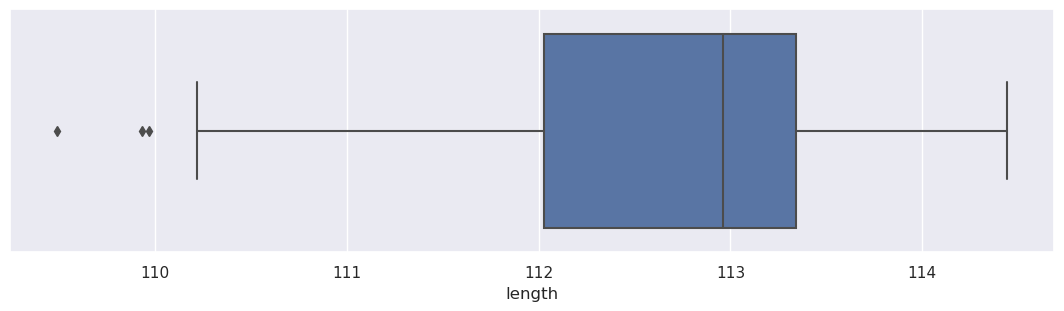

Premier quartile: 112.03
Troisième qurtile: 113.34
Ecart interquartile: 1.3100000000000023
Min: 110.065
Max: 115.305


In [1272]:
#Représentation la variable length sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=billets_n["length"], color="b")
plt.show()
length= billets_n["length"]
length= sorted(length)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(length,[25,75])
print("Premier quartile:",q1)
print("Troisième qurtile:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("Ecart interquartile:",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("Min:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("Max:",trait_superieur)

In [1273]:
#Recherche des outliers 
billets_n.loc[billets_n["length"]<110.065]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1082       False    171.75       103.96        103.83        5.39       3.54   
1355       False    171.68       103.89        103.70        5.97       3.03   
1453       False    171.55       104.20        104.49        5.42       3.54   

      length  
1082  109.49  
1355  109.97  
1453  109.93

In [1274]:
billets_n

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95       4.520       2.89   
1           True    171.46       103.36        103.66       3.770       2.99   
2           True    172.69       104.48        103.50       4.400       2.94   
3           True    171.36       103.91        103.94       3.620       3.01   
4           True    171.73       104.28        103.46       4.040       3.48   
...          ...       ...          ...           ...         ...        ...   
1303       False    172.17       104.49        103.76       5.239       2.93   
1315       False    172.08       104.15        104.17       4.893       3.40   
1347       False    171.72       104.46        104.12       5.019       3.61   
1435       False    172.66       104.33        104.41       4.964       3.56   
1438       False    171.90       104.28        104.29       5.171       3.24   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49  

[1500 rows x 7 columns]

# Analyse exploratoire

In [1275]:
billets_new= billets_n

In [1276]:
billets_true = billets_new[billets_new['is_genuine'] == True]
billets_false = billets_new[billets_new['is_genuine'] == False]

In [1277]:
#Describe sur les billets true
billets_true.describe()

diagonal  height_left  height_right   margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  1000.000000  1000.00000   
mean    171.987080   103.949130     103.80865     4.119178     3.05213   
std       0.300441     0.300231       0.29157     0.316858     0.18634   
min     171.040000   103.140000     102.82000     2.980000     2.27000   
25%     171.790000   103.740000     103.61000     3.910000     2.93000   
50%     171.990000   103.950000     103.81000     4.120000     3.05000   
75%     172.200000   104.140000     104.00000     4.340000     3.18000   
max     172.920000   104.860000     104.95000     5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

In [1278]:
#Describe sur les billets false
billets_false.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  500.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.213798    3.350160   
std      0.306861     0.223758      0.270878    0.549724    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.185000    3.350000   
75%    172.092500   104.332500    104.320000    5.590000    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

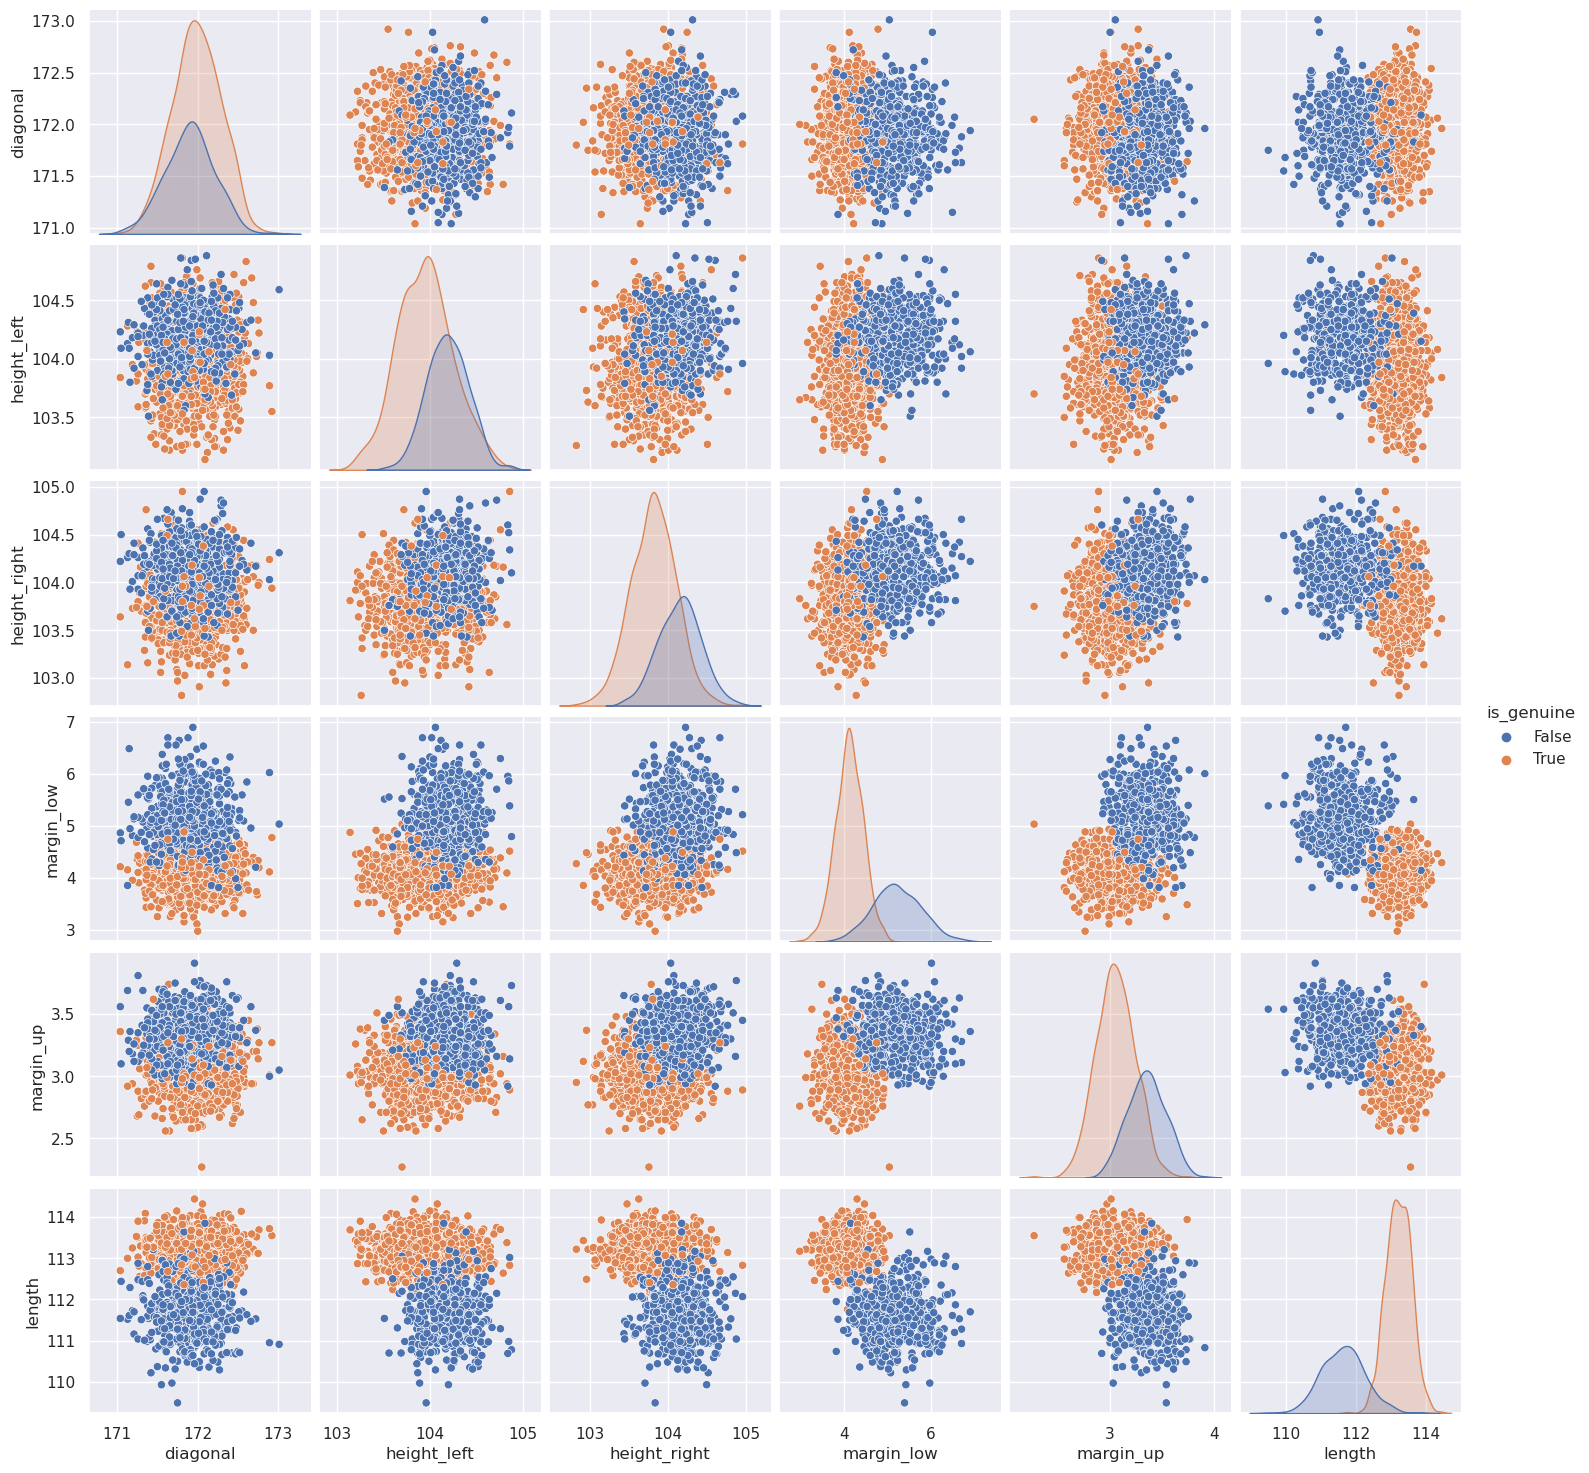

In [1279]:
# Répartition des billets en fonctions de leurs 6 variables (dimensions)
sns.pairplot(billets, hue="is_genuine")
plt.savefig('repartition.png')

# ACP

In [1280]:
#Nous enregistrons la variable qualitative dans une variable vf :
vqual = billets_n.is_genuine
vqual
#et nos variables quantitaves dans une variable billets_num :
columns = billets.select_dtypes('number')
columns

diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95       4.520       2.89  112.83
1       171.46       103.36        103.66       3.770       2.99  113.09
2       172.69       104.48        103.50       4.400       2.94  113.16
3       171.36       103.91        103.94       3.620       3.01  113.51
4       171.73       104.28        103.46       4.040       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1303    172.17       104.49        103.76       5.239       2.93  111.21
1315    172.08       104.15        104.17       4.893       3.40  112.29
1347    171.72       104.46        104.12       5.019       3.61  110.31
1435    172.66       104.33        104.41       4.964       3.56  111.47
1438    171.90       104.28        104.29       5.171       3.24  111.49

[1500 rows x 6 columns]

In [1281]:
#On centre-réduit
X = columns
# On instancie
scaler = StandardScaler()
# On fit
scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X)

In [1282]:
# On importe la fonction PCA de scikit_learn
from sklearn.decomposition import PCA

# On créé le modèle PCA
model_pca = PCA()

# On fit le modèle avec les données
X_reduced = model_pca.fit_transform(X_scaled)

In [1283]:
# La variance captée par chaque nouvelle composante.
model_pca.explained_variance_ratio_
#Ici la 1ère composante capte 43% de la variance de nos données initiales, la 2ème 17% etc.

array([0.43188823, 0.16960843, 0.13023451, 0.11820139, 0.09664099,
       0.05342645])

In [1284]:
# Enregister cela dans une variable
scree = (model_pca.explained_variance_ratio_*100).round(2)
scree

array([43.19, 16.96, 13.02, 11.82,  9.66,  5.34])

In [1285]:
#Pour faire une somme cumulée numpy dispose de la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

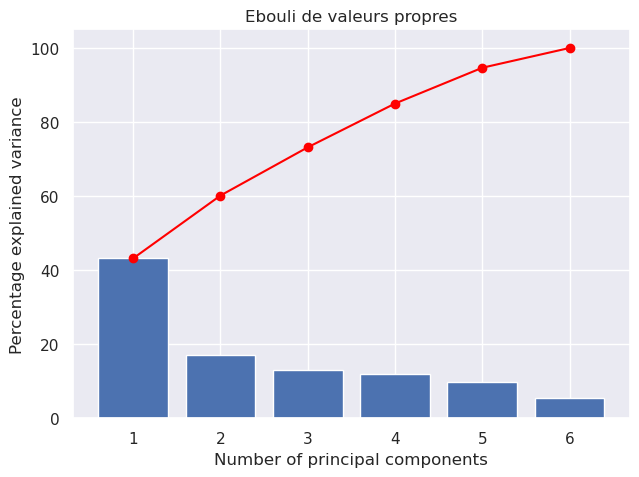

In [1286]:
# Scree plot
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Ebouli de valeurs propres")
    plt.show(block=False)
#Utilisation de la fonction pour tracer le scree plot
display_scree_plot(model_pca) 

In [1287]:
#Nombre de composantes qui concentrent près de 70% de la variance
np.argmax(np.cumsum(model_pca.explained_variance_ratio_*100)>= 70)

2

In [1288]:
# Le nombre de composantes à étudier est donc de 2
num_components = 2

In [1289]:
#Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = model_pca.components_

In [1290]:
#Affichons la même chose mais version pandas principal components :
pcs = pd.DataFrame(pcs)
pcs
#On arrondit pour plus de clarté et in rajoute le nom des colonnes
nomdescolonnes=columns.columns
pcs.columns = nomdescolonnes
pcs.round(2)

diagonal  height_left  height_right  margin_low  margin_up  length
0     -0.09         0.33          0.39        0.51       0.44   -0.53
1      0.94         0.31          0.11       -0.08      -0.00    0.05
2     -0.29         0.88         -0.17       -0.11      -0.27    0.15
3     -0.10        -0.05          0.86       -0.09      -0.45    0.18
4     -0.12         0.10          0.24       -0.57       0.71    0.30
5      0.01         0.01          0.00        0.63       0.18    0.76

In [1291]:
#Cercles de corrélation et projections des individus

In [1292]:
#Fonction pour afficher la projection des individus
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

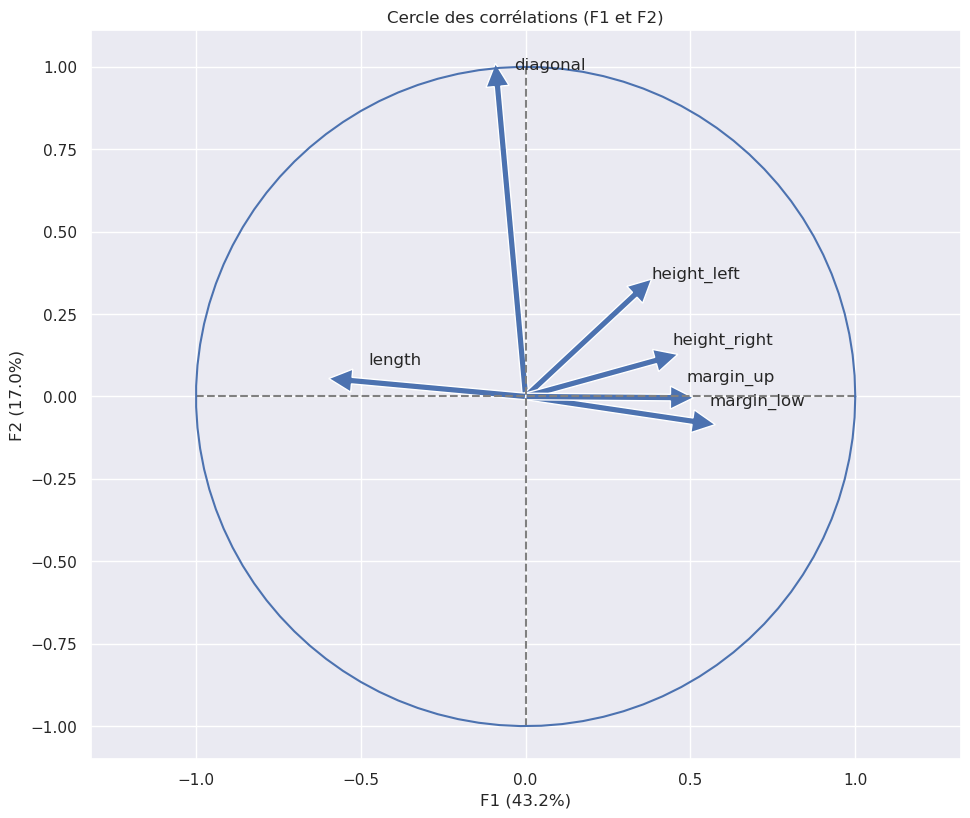

In [1293]:
#Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :
x, y = 0,1
#Pour la partie graphique :

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, model_pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             model_pca.components_[0, i],  #0 for PC1
             model_pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(model_pca.components_[0, i] + 0.05,
             model_pca.components_[1, i] + 0.05,
             nomdescolonnes[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*model_pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*model_pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
# Ajouter un unit circle for scale
plt.axis('equal')
plt.show(block=False)

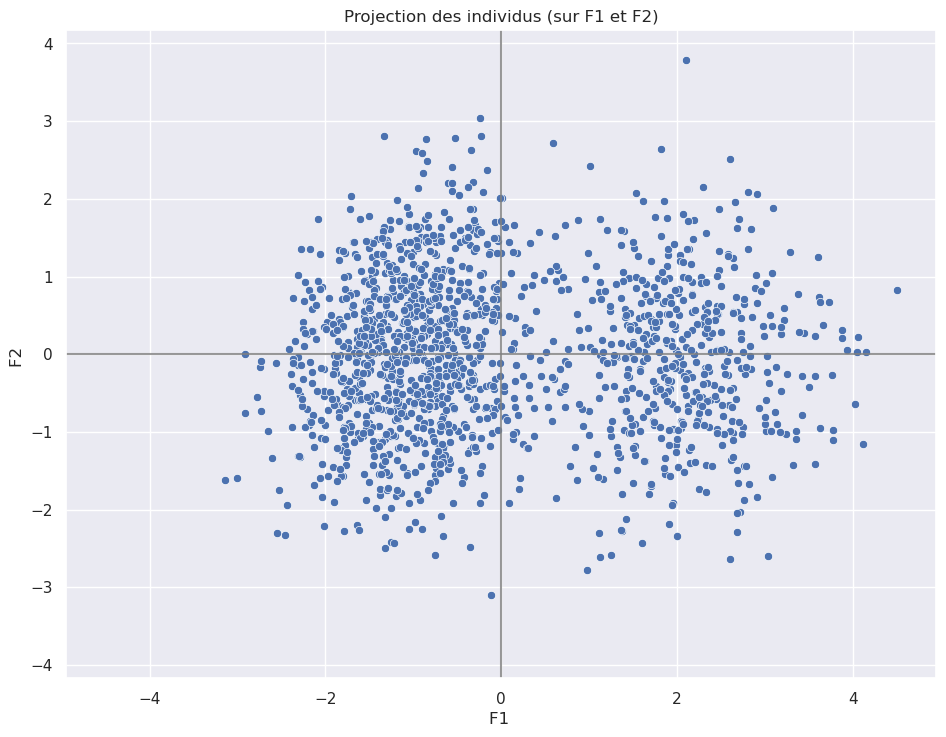

In [1294]:
#Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :
X_proj = model_pca.transform(X_scaled)
X_proj[:4]
#Rappelons que :
x_y = (0,1)
x_y
#Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :
x_y = [0,1]
display_factorial_planes(X_proj, x_y)


# Algorithme du K-means

In [1295]:
# Utilisation des données
std_scale = preprocessing.StandardScaler().fit(billets_new)
df_scaled = std_scale.transform(billets_new)
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_k = pd.DataFrame(df_scaled, index=billets_new.is_genuine, columns=billets_new.columns)
df_s = df_k[['diagonal','height_left','height_right','margin_low','margin_up','length']]
df_s.head()

diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                               
True       -0.486540     2.774123      3.163240    0.054589  -1.128325   
True       -1.633729    -2.236535     -0.799668   -1.084311  -0.696799   
True        2.397823     1.504756     -1.291191   -0.127635  -0.912562   
True       -1.961498    -0.399294      0.060498   -1.312091  -0.610494   
True       -0.748754     0.836669     -1.414072   -0.674307   1.417677   

              length  
is_genuine            
True        0.173651  
True        0.471666  
True        0.551901  
True        0.953075  
True       -0.158750

In [1296]:
# On supprime la colonne is_genuine du DF pour effectuer le clustering 
df_sans_genuine = billets_n.drop(columns=['is_genuine'])
df_sans_genuine.to_csv("dfbillets.csv", sep=";", index=False)

In [1297]:
#On prépare les variables dépendantes et indépendantes :
X_km = billets.iloc[:, 1:]
y_km = billets.iloc[:,:1]
#Divisions des données en ensembles d'entraînement et de test 
sss = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=0)
for train, test in sss.split(X_km, y_km):
   # Seed pour la reproductibilité
   random_seed = 42
   # Divisez les données en ensembles d'apprentissage et de test
   X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(X_km, y_km, test_size=0.2, random_state=random_seed)


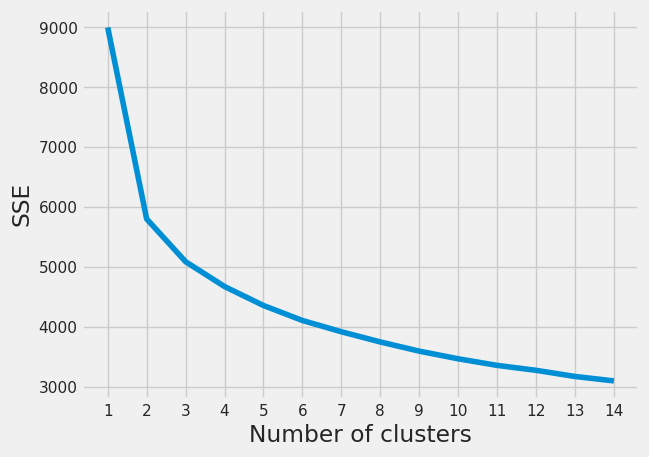

In [1298]:
# Assume X_scaled is your data after scaling
# Handle missing and infinite values in X_scaled
X_scaled[np.isnan(X_scaled)] = 0  # Replace NaN with 0
X_scaled[np.isinf(X_scaled)] = 0  # Replace infinite values with 0
# Method du coude to find the optimal number of clusters (k)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# List containing the values of SSE for each k
sse = []
for k in range(1, 15):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [1299]:
#Selection du nombre de clusters avec la methode du coude
print("Le nombre de cluster idéal selon la méthode du coude est de 2")

Le nombre de cluster idéal selon la méthode du coude est de 2


In [1300]:
cls = cluster.KMeans(init='random', n_clusters=2, n_init=10, max_iter =300, random_state = 42)
cls.fit(df_scaled)

KMeans(init='random', n_clusters=2, random_state=42)

In [1301]:
# Instanciation de l'algorithme KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
# Entraînement du modèle sur les données d'entraînement
kmeans.fit(X_train_km)

KMeans(n_clusters=2, random_state=42)

In [1302]:
# Prédiction des clusters sur les données de test
y_pred_km = kmeans.predict(X_test_km)

In [1303]:
# Remplacez les clusters 1 par False et les clusters 0 par True
y_pred_km = np.where(y_pred_km == 1, False, True)

In [1304]:
X_test_kmeans = X_test_km.copy()
X_test_kmeans["Cluster"] = y_pred_km
X_test_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length  \
1147    172.43       104.06        104.02        4.93       3.33  111.59   
1403    171.53       104.25        104.17        4.30       3.50  112.23   
432     171.47       104.46        104.30        4.12       3.06  113.59   
423     171.70       104.32        104.07        4.21       2.67  112.73   
462     171.48       103.95        103.93        4.52       2.91  113.21   
...        ...          ...           ...         ...        ...     ...   
1012    171.37       103.73        104.18        4.97       3.34  110.98   
820     171.88       104.44        103.50        4.53       3.06  113.52   
1297    171.96       104.47        104.06        4.84       3.76  111.04   
1182    172.05       104.15        104.56        5.35       3.56  111.20   
847     172.14       104.07        103.83        3.79       3.14  113.85   

      Cluster  
1147    False  
1403    False  
432      True  
423      True  
462      True  
...       ...  
1012    False  
820      True  
1297    False  
1182    False  
847      True  

[300 rows x 7 columns]

In [1305]:
f1 = f1_score(y_test_km, y_pred_km)  # Pour une classification binaire
f1

0.9868766404199474

In [1306]:
#On ajoute la variable au dataframe initial
df_s['Kmeans'] = cls.labels_
df_s

diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                               
True       -0.486540     2.774123      3.163240    0.054589  -1.128325   
True       -1.633729    -2.236535     -0.799668   -1.084311  -0.696799   
True        2.397823     1.504756     -1.291191   -0.127635  -0.912562   
True       -1.961498    -0.399294      0.060498   -1.312091  -0.610494   
True       -0.748754     0.836669     -1.414072   -0.674307   1.417677   
...              ...          ...           ...         ...        ...   
False       0.693427     1.538161     -0.492466    1.146415  -0.955715   
False       0.398435     0.402412      0.767063    0.621002   1.072457   
False      -0.781531     1.437948      0.613462    0.812338   1.978661   
False       2.299493     1.003691      1.504349    0.728818   1.762898   
False      -0.191548     0.836669      1.135706    1.043155   0.382015   

              length  Kmeans  
is_genuine                    
True        0.173651       0  
True        0.471666       1  
True        0.551901       1  
True        0.953075       1  
True       -0.158750       1  
...              ...     ...  
False      -1.683213       0  
False      -0.445303       0  
False      -2.714803       0  
False      -1.385197       0  
False      -1.362273       0  

[1500 rows x 7 columns]

In [1307]:
#Tableau de comparaison
pd.crosstab(index=df_s.index,columns=df_s['Kmeans'])

Kmeans    0    1
row_0           
False   498    2
True      1  999

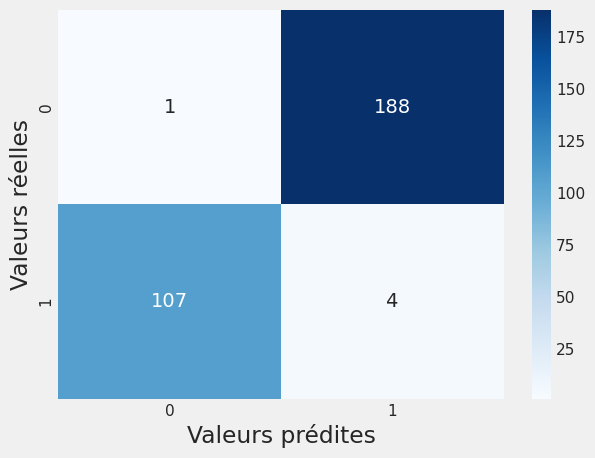

In [1308]:
# Calcul de la matrice de confusion
confusion_km = confusion_matrix(y_test_km, y_pred_km)
confusion_km = np.flipud(confusion_km)

# Création de la heatmap
sns.heatmap(confusion_km, annot=True, fmt='d', cmap="Blues")

# Ajout des labels pour les axes x et y
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

# Affichage du graphique
plt.show()

# Centroides

In [1309]:
#On calcule les centroides
centroid_kmeans = df_s.groupby('Kmeans').mean()
centroid_kmeans.head(10)

diagonal  height_left  height_right  margin_low  margin_up    length
Kmeans                                                                      
0      -0.191876     0.543594       0.69368    1.112539   0.853840 -1.205364
1       0.095651    -0.270982      -0.34580   -0.554602  -0.425641  0.600876

In [1310]:
#Le cluster 1 a le plus haut height_left, height_right, marin_low et margin_up
#Le cluster 0 a le plus haut diagonal et lenght

# Régréssion logistique

La régression logistique est une approche statistique qui peut être employée pour évaluer et caractériser les relations entre une variable réponse de type binaire , et une, ou plusieurs, variables explicatives, qui peuvent être de type catégoriel , ou numérique continu.

# Modélisations

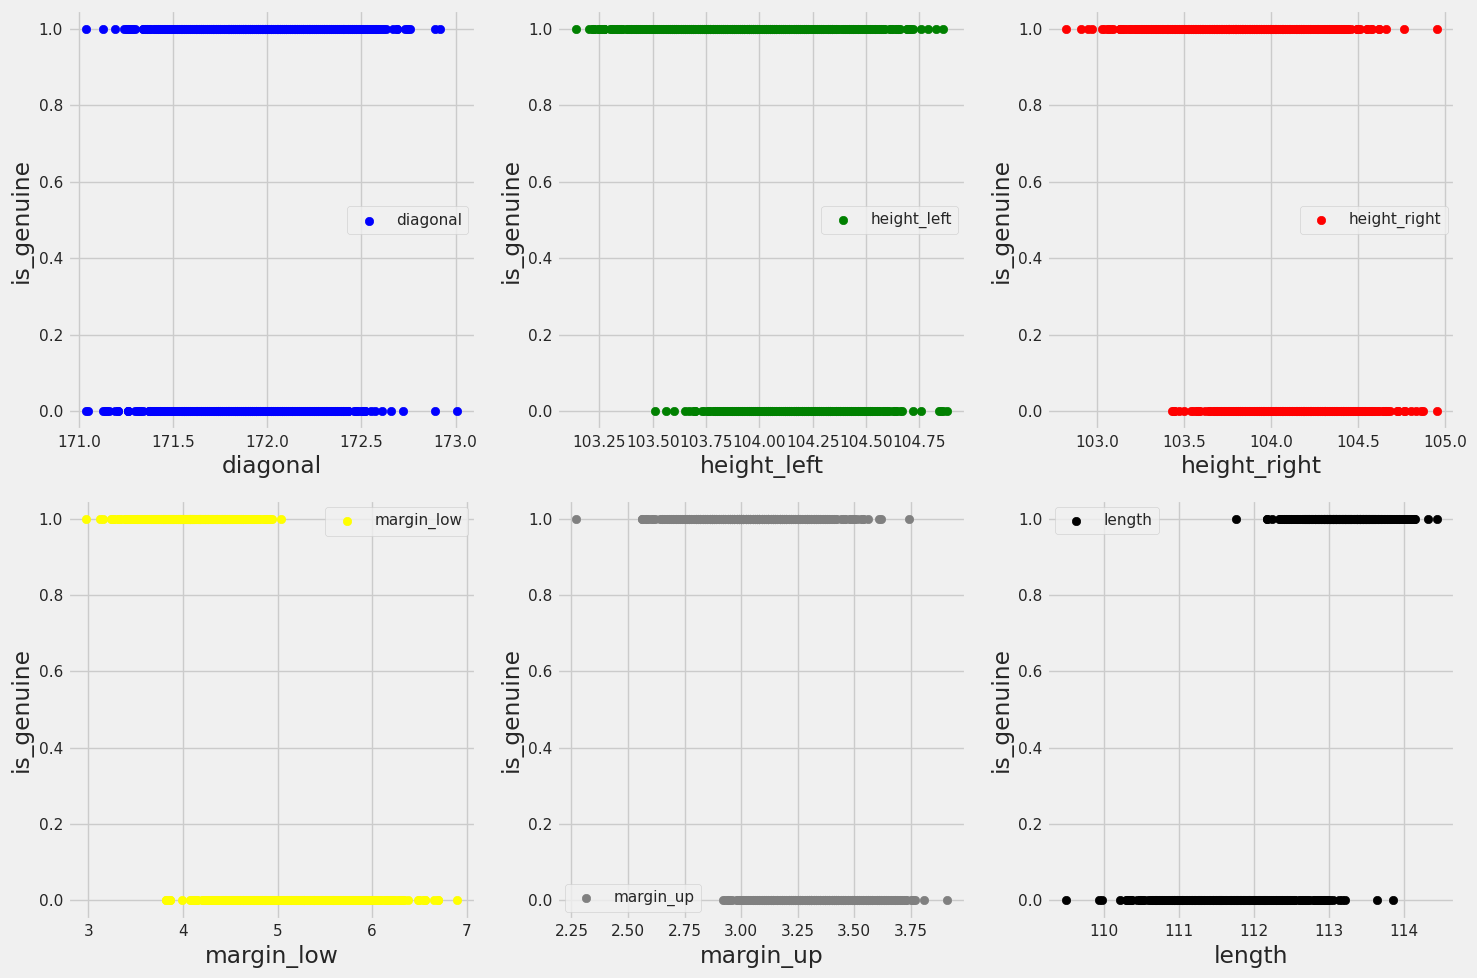

In [1311]:
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Variables explicatives
variables_explicatives = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Couleurs pour les graphiques
couleurs = ['blue', 'green', 'red', 'yellow', 'gray', 'black']

# Boucle pour créer les sous-graphiques
for i, (variable, couleur) in enumerate(zip(variables_explicatives, couleurs)):
    ax = axes[i // 3, i % 3]  # Sélectionner le sous-graphique correspondant
    
    # Nuage de points
    ax.scatter(billets[variable], billets['is_genuine'], color=couleur, label=variable)
    
    ax.set_xlabel(variable)
    ax.set_ylabel('is_genuine')
    ax.legend()

plt.tight_layout()
plt.show()


On modélise la probabilité de réalisation d’une des deux modalités.
Cette probabilité, est modélisée par une courbe sigmoïde, bornée par 0, et 1

# Courbe logistique margin_low

In [1312]:
#On cherche b1 et b2 pour margin_low
reg_log1 = smf.glm('is_genuine ~  margin_low', 
                  data=billets_new, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1498
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -322.65
Date:                                       Thu, 31 Aug 2023   Deviance:                       645.30
Time:                                               19:08:38   Pearson chi2:                 1.83e+03
No. Iterations:                                            7   Pseudo R-squ. (CS):             0.5695
Covariance Type:                                   nonrobust                      

Optimization terminated successfully.
         Current function value: 0.215101
         Iterations 8


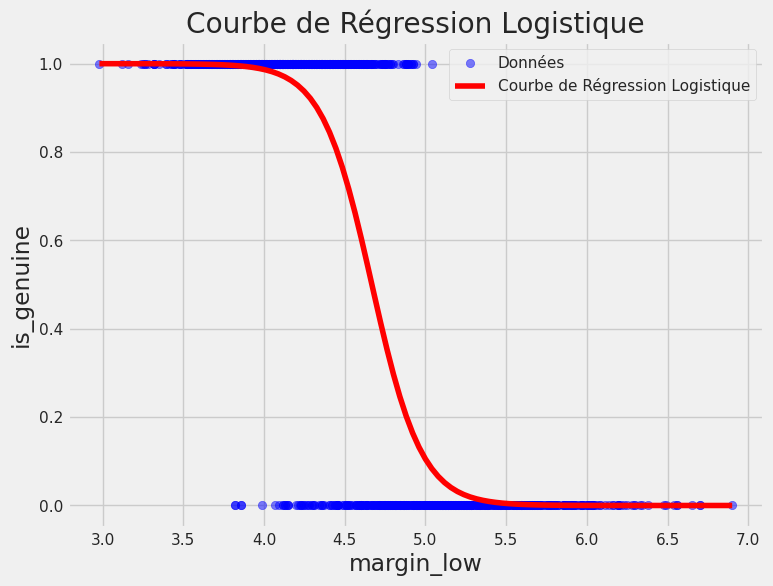

In [1313]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà chargé vos données dans billets_new

# Régression logistique
X = sm.add_constant(billets_new['margin_low'])  # Ajout d'une colonne constante pour l'interception
y = billets_new['is_genuine']
reg_log = sm.Logit(y, X).fit()

# Points de données
x_values = np.linspace(billets_new['margin_low'].min(), billets_new['margin_low'].max(), 100)
y_values = reg_log.predict(sm.add_constant(x_values))

# Tracé des données et de la courbe de régression logistique
plt.figure(figsize=(8, 6))
plt.scatter(billets_new['margin_low'], billets_new['is_genuine'], label='Données', color='blue', alpha=0.5)
plt.plot(x_values, y_values, label='Courbe de Régression Logistique', color='red')
plt.xlabel('margin_low')
plt.ylabel('is_genuine')
plt.title('Courbe de Régression Logistique')
plt.legend()
plt.grid(True)
plt.show()


# Courbe logistique length

In [1314]:
#On cherche b1 et b2 pour length
reg_log1 = smf.glm('is_genuine ~  length', 
                  data=billets_new, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1498
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -191.21
Date:                                       Thu, 31 Aug 2023   Deviance:                       382.43
Time:                                               19:08:39   Pearson chi2:                 1.22e+04
No. Iterations:                                            8   Pseudo R-squ. (CS):             0.6387
Covariance Type:                                   nonrobust                      

Optimization terminated successfully.
         Current function value: 0.127476
         Iterations 10


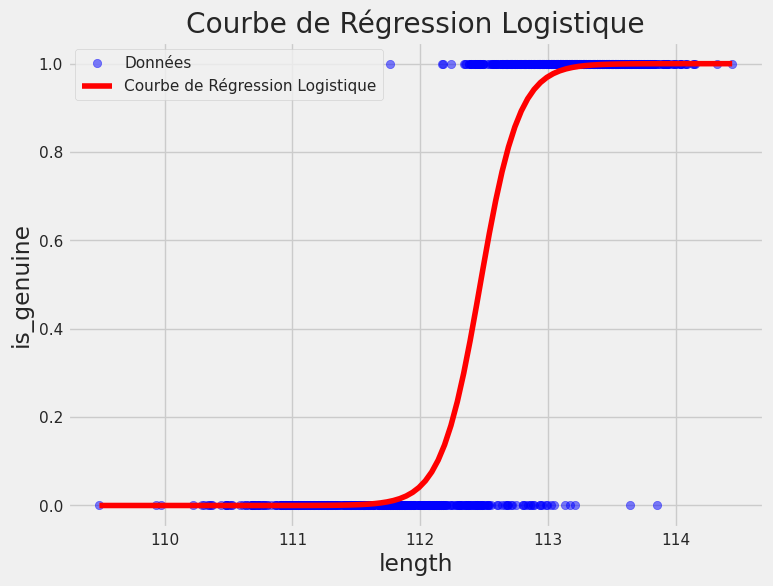

In [1315]:
# Régression logistique
X = sm.add_constant(billets_new['length'])  # Ajout d'une colonne constante pour l'interception
y = billets_new['is_genuine']
reg_log = sm.Logit(y, X).fit()

# Points de données
x_values = np.linspace(billets_new['length'].min(), billets_new['length'].max(), 100)
y_values = reg_log.predict(sm.add_constant(x_values))

# Tracé des données et de la courbe de régression logistique
plt.figure(figsize=(8, 6))
plt.scatter(billets_new['length'], billets_new['is_genuine'], label='Données', color='blue', alpha=0.5)
plt.plot(x_values, y_values, label='Courbe de Régression Logistique', color='red')
plt.xlabel('length')
plt.ylabel('is_genuine')
plt.title('Courbe de Régression Logistique')
plt.legend()
plt.grid(True)
plt.show()


# Réalisation de la régression logistique

On va réaliser notre régression logistique

In [1316]:
reg_log = smf.glm('is_genuine ~ diagonal+height_left+height_right+margin_low+margin_up+length', 
                  data=billets_new, family=sm.families.Binomial()).fit()

print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1493
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -43.163
Date:                                       Thu, 31 Aug 2023   Deviance:                       86.326
Time:                                               19:08:39   Pearson chi2:                 2.23e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7034
Covariance Type:                                   nonrobust                      

_Valeur p élevée (0.916), ce coefficient n'est pas statistiquement significatif, ce qui suggère que "diagonal" n'a pas d'effet significatif sur la variable dépendante dans ce modèle.

_Valeur p de 0.125, ce coefficient n'est pas statistiquement significatif à un seuil conventionnel de 0.05.

_Valeur p de 0.038, ce coefficient est statistiquement significatif à un seuil de 0.05, ce qui suggère qu'il y a un effet significatif de "height_right" sur la variable dépendante.

_Cette variable a un effet statistiquement significatif (valeur p < 0.001).

_Cette variable a un effet statistiquement significatif (valeur p < 0.001).

_Cette variable a un effet statistiquement significatif (valeur p < 0.001).

In [1317]:
#On recommence la régression logistique en enlevant un à un les coefficients, on commence par l'intercept
reg_log = smf.glm('is_genuine ~ diagonal + height_right + height_left + margin_low + margin_up + length - 1', 
                  data=billets_new, family=sm.families.Binomial()).fit()

print(reg_log.summary())


                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1494
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -43.553
Date:                                       Thu, 31 Aug 2023   Deviance:                       87.106
Time:                                               19:08:39   Pearson chi2:                 1.69e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7033
Covariance Type:                                   nonrobust                      

In [1318]:
#On recommence la régression logistique en enlevant un à un les coefficients, on continue avec diagonal
reg_log = smf.glm('is_genuine ~  height_right + height_left + margin_low + margin_up + length - 1', 
                  data=billets_new, family=sm.families.Binomial()).fit()

print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1495
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -43.938
Date:                                       Thu, 31 Aug 2023   Deviance:                       87.876
Time:                                               19:08:40   Pearson chi2:                 1.17e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7031
Covariance Type:                                   nonrobust                      

In [1319]:
#On prépare les variables dépendantes et indépendantes :
X = billets.iloc[:, 1:]
y = billets.iloc[:,:1]
#Divisions des données en ensembles d'entraînement et de test 
sss = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=0)
for train, test in sss.split(X, y):
   # Seed pour la reproductibilité
   random_seed = 42
   # Divisez les données en ensembles d'apprentissage et de test
   X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [1320]:
df_logistic = pd.DataFrame(X_test_log)
df_kmeans = pd.DataFrame(X_test_km)
# Calculer la différence entre les deux DataFrames
df_difference = df_logistic - df_kmeans
print(df_difference)

      diagonal  height_left  height_right  margin_low  margin_up  length
1147       0.0          0.0           0.0         0.0        0.0     0.0
1403       0.0          0.0           0.0         0.0        0.0     0.0
432        0.0          0.0           0.0         0.0        0.0     0.0
423        0.0          0.0           0.0         0.0        0.0     0.0
462        0.0          0.0           0.0         0.0        0.0     0.0
...        ...          ...           ...         ...        ...     ...
1012       0.0          0.0           0.0         0.0        0.0     0.0
820        0.0          0.0           0.0         0.0        0.0     0.0
1297       0.0          0.0           0.0         0.0        0.0     0.0
1182       0.0          0.0           0.0         0.0        0.0     0.0
847        0.0          0.0           0.0         0.0        0.0     0.0

[300 rows x 6 columns]


In [1321]:
# Comparer les deux séries pour vérifier si elles sont identiques
are_identical = y_train_log['is_genuine'].equals(y_train_km['is_genuine'])
if are_identical:
    print("Les deux jeux de données y_train_log et y_train_km sont identiques.")
else:
    print("Les deux jeux de données y_train_log et y_train_km ne sont pas identiques.")

Les deux jeux de données y_train_log et y_train_km sont identiques.


In [1322]:
# Test du model de regression logistic
models={
    'Régréssion logistique':LogisticRegression(random_state = 0),
}
models

{'Régréssion logistique': LogisticRegression(random_state=0)}

In [1323]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)
# Création et ajustement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train_log)
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

In [1324]:
datalogr = billets_new.join(pd.DataFrame(logr.predict(X)))
datalogr = datalogr.rename(columns={0:"prediction"})
datalogr

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95       4.520       2.89   
1           True    171.46       103.36        103.66       3.770       2.99   
2           True    172.69       104.48        103.50       4.400       2.94   
3           True    171.36       103.91        103.94       3.620       3.01   
4           True    171.73       104.28        103.46       4.040       3.48   
...          ...       ...          ...           ...         ...        ...   
1303       False    172.17       104.49        103.76       5.239       2.93   
1315       False    172.08       104.15        104.17       4.893       3.40   
1347       False    171.72       104.46        104.12       5.019       3.61   
1435       False    172.66       104.33        104.41       4.964       3.56   
1438       False    171.90       104.28        104.29       5.171       3.24   

      length  prediction  
0     112.83       False  
1     113.09        True  
2     113.16        True  
3     113.51        True  
4     112.54        True  
...      ...         ...  
1303  111.21       False  
1315  112.29       False  
1347  110.31       False  
1435  111.47       False  
1438  111.49       False  

[1500 rows x 8 columns]

In [1325]:
#Matrice de confusion sur l'ensemble des donnée
predBrut = logr.predict(X)
print(np.unique(predBrut, return_counts=True))

(array([False,  True]), array([ 496, 1004]))


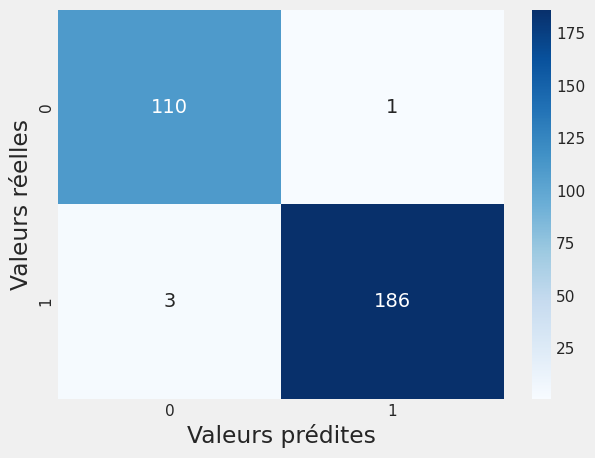

In [1326]:
predBrut = logr.predict(X_test_log)
confusion_mat = confusion_matrix(y_test_log, predBrut)
# Création de la heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues")

# Ajout des labels pour les axes x et y
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

# Affichage du graphique
plt.show()

# Métriques d'évaluation

In [1327]:
print("Rapport pour le modèle KM :",
      classification_report(y_test_km,y_pred_km), sep="\n")
print('=========================================')   
print("Rapport pour le modèle RLog :",
      classification_report(y_test_log,y_pred), sep="\n")

Rapport pour le modèle KM :
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       111
        True       0.98      0.99      0.99       189

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Rapport pour le modèle RLog :
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       111
        True       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [1328]:
#TP (True Positives) : Le nombre d'échantillons de la classe positive (P) correctement classés comme positifs.
#FP (False Positives) : Le nombre d'échantillons de la classe négative (N) incorrectement classés comme positifs.
#FN (False Negatives) : Le nombre d'échantillons de la classe positive (P) incorrectement classés comme négatifs.
#TN (True Negatives) : Le nombre d'échantillons de la classe négative (N) correctement classés comme négatifs.
#F1= (2×TP)/(2×TP+FP+FN2×TP)

# Algorithme de détéction des billets en kmeans

In [1329]:
#standardise(donnees test) 
#for(billets A1 to A5)
#compute(distance(A1,center0))
#compute(distance(A1,center1))
#if (distance(A1,center0))<(distance(A1,center1))
#A1 appartient a cluster 0
#else A1 appartient cluster 1

In [1330]:
# Charger les données depuis un fichier (format CSV par exemple)
donnees_test = pd.read_csv('billets_production.csv')
center0 = centroid_kmeans[centroid_kmeans.index == 0]
center1 = centroid_kmeans[centroid_kmeans.index == 1]
# Sélectionner les colonnes correspondant aux billets A1 à A5
billets_columns = donnees_test[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]
# Standardisation des données de test
scaler = StandardScaler()
donnees_test_std = scaler.fit_transform(billets_columns)
# Initialisation d'une liste pour stocker les résultats
results = []
# Calcul des distances de chaque individu aux deux centres de cluster
for individual_id, row in zip(donnees_test['id'], donnees_test_std):
    distance_to_center0 = np.linalg.norm(row - center0)
    distance_to_center1 = np.linalg.norm(row - center1)
    # Attribution au cluster en fonction de la plus petite distance
    if distance_to_center0 < distance_to_center1:
        cluster_assigned = False
    else:
        cluster_assigned = True
    results.append({'id': individual_id, 'cluster_assigned': cluster_assigned})
# Créer un DataFrame à partir des résultats
result_df = pd.DataFrame(results)
result_df=result_df.join(pd.DataFrame(billets_columns))
result_df


id  cluster_assigned  diagonal  height_left  height_right  margin_up  \
0  A_1             False    171.76       104.01        103.54       3.30   
1  A_2             False    171.87       104.17        104.13       3.31   
2  A_3             False    172.00       104.58        104.29       3.39   
3  A_4              True    172.49       104.55        104.34       3.03   
4  A_5              True    171.65       103.63        103.56       3.16   

   margin_low  length  
0        5.21  111.42  
1        6.00  112.09  
2        4.99  111.57  
3        4.44  113.20  
4        3.77  113.33

# Algorithme de détéction des billets avec la régression logistique

In [1331]:
billets_test = pd.read_csv('billets_production.csv', sep = ',') #Donnée à tester
billets_test.set_index('id', inplace=True)
print(billets_test.shape)

(5, 6)


In [1332]:
# Utilisation des données
std_scale = preprocessing.StandardScaler().fit(billets_test)
df_scaled = std_scale.transform(billets_test)
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_k = pd.DataFrame(df_scaled, index=billets_test.index, columns=billets_test.columns)
df_s = df_k[['diagonal','height_left','height_right','margin_low','margin_up','length']]

In [1333]:
#Application du modéle sur les données à tester
#billets_test.head()
billets_test_predict = df_s
billets_test["prediction"] = logr.predict(billets_test_predict.values)
billets_test_proba = billets_test.drop(columns=["prediction"])
billets_test.head()

diagonal  height_left  height_right  margin_low  margin_up  length  \
id                                                                        
A_1    171.76       104.01        103.54        5.21       3.30  111.42   
A_2    171.87       104.17        104.13        6.00       3.31  112.09   
A_3    172.00       104.58        104.29        4.99       3.39  111.57   
A_4    172.49       104.55        104.34        4.44       3.03  113.20   
A_5    171.65       103.63        103.56        3.77       3.16  113.33   

     prediction  
id               
A_1       False  
A_2       False  
A_3       False  
A_4        True  
A_5        True